In [33]:
import pandas as pd
import h5py
import numpy as np

data = pd.read_hdf('Downloads/nsfg.hdf5')
data.head()

data.shape
data.columns

ounces = data['birthwgt_oz1']
ounces.head(100)

0      4.0
1     12.0
2      4.0
3      NaN
4     13.0
      ... 
95     NaN
96     NaN
97     9.0
98     8.0
99     9.0
Name: birthwgt_oz1, Length: 100, dtype: float64

In [34]:
data.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [36]:
data['nbrnaliv'].replace(8, np.nan, inplace = True)
print(data['nbrnaliv'].value_counts())

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64


In [40]:
agecon = data['agecon'] / 100
agepreg = data['agepreg'] / 100

preg_length = agecon - agepreg
preg_length.describe()

count    9109.000000
mean       -0.552069
std         0.271479
min        -0.920000
25%        -0.750000
50%        -0.670000
75%        -0.250000
max         0.000000
dtype: float64

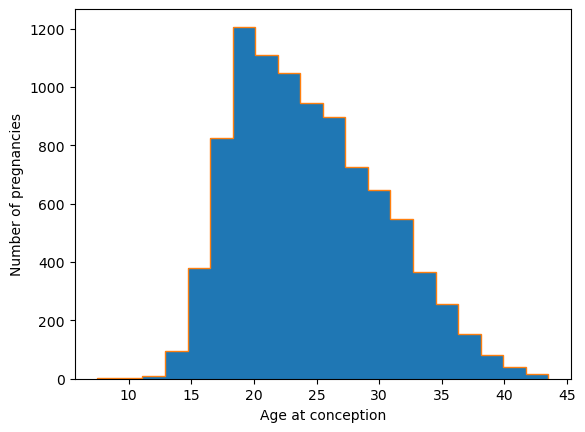

In [43]:
import matplotlib.pyplot as plt

plt.hist(agecon, bins = 20)
plt.hist(agecon, bins = 20, histtype = 'step')

plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')
plt.show()

In [45]:
ful_term = data['prglngth'] >= 37
ful_term.mean()

0.600128232528318

In [47]:
full_term = data['prglngth'] >= 37
single = data['nbrnaliv'] == 1

single_full_term_weight = birth_weight[single & full_term]
single_full_term.mean()

NameError: name 'birth_weight' is not defined

## Distributions

In [99]:
gss = pd.read_hdf('Downloads/gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [60]:
from scipy.stats import norm
sample= np.random.normal(size = 1000)
Cdf(sample).plot

NameError: name 'Cdf' is not defined

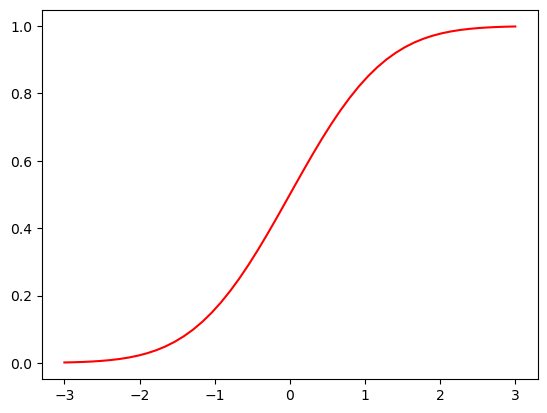

In [64]:
xs = np.linspace(-3,3)
ys = norm(0,1).cdf(xs)
plt.plot(xs,ys, color= 'red')

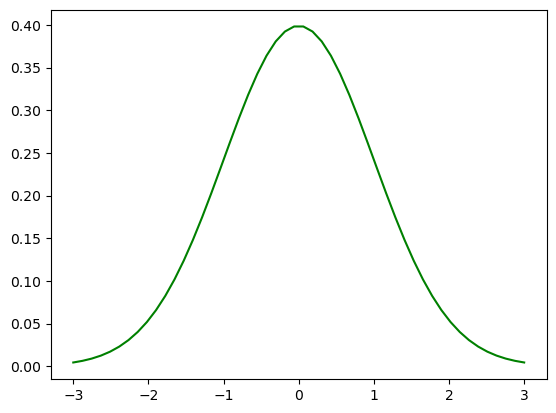

In [65]:
xs = np.linspace(-3,3)
ys = norm(0,1).pdf(xs)
plt.plot(xs,ys, color= 'green')


In [68]:
income = gss['realinc']
log_income = np.log10(income)
mean = log_income.mean()
std = log_income.std()

print(mean, std)

dist = norm(mean,std)
dist

4.371148677934171 0.4290082383271419


Text(0, 0.5, 'CDF')

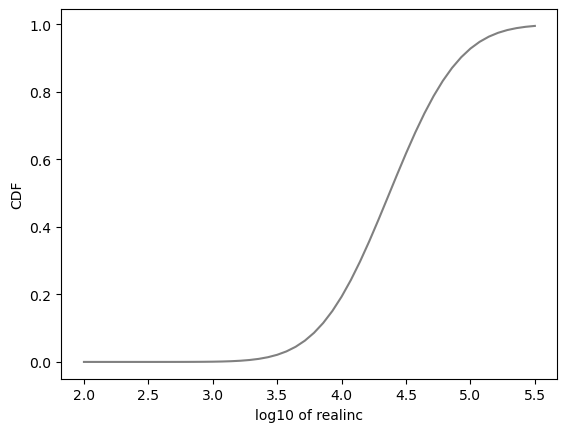

In [72]:
xs = np.linspace(2,5.5)
ys = dist.cdf(xs)

plt.clf()
plt.plot(xs,ys, color = 'gray')
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')

Text(0, 0.5, 'PDF')

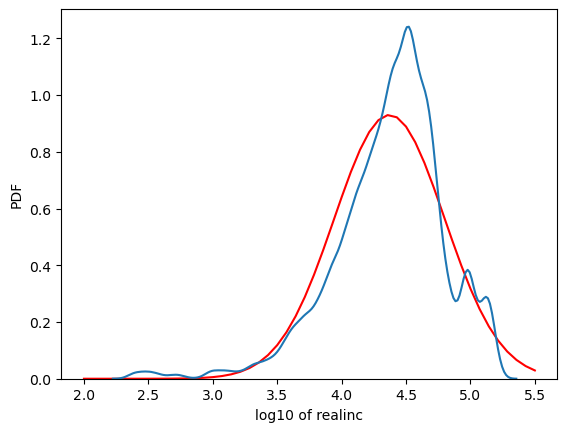

In [73]:
import seaborn as sns
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

plt.clf()
plt.plot(xs,ys, color = 'red')

sns.kdeplot(log_income)

plt.xlabel('log10 of realinc')
plt.ylabel('PDF')


# Relationships

In [82]:
brfss = pd.read_hdf('Downloads/brfss.hdf5')
age = brfss['AGE']

pmf_age = Pmf(age)
pmf_age.bar()

plt.xlabel('Age in Years')
plt.ylabel('PMF')
plt.show()

NameError: name 'Pmf' is not defined

In [76]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


Text(0, 0.5, 'Weight in Kg')

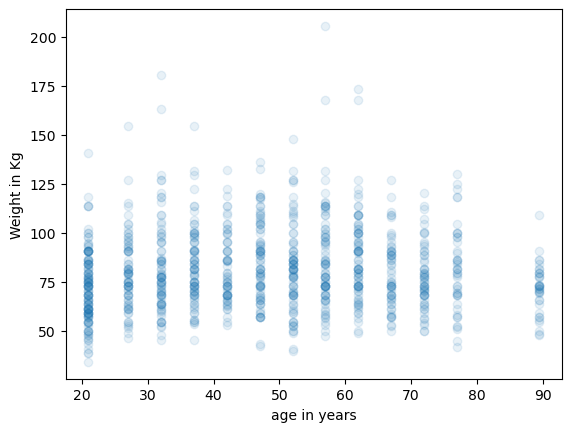

In [83]:
brfss = brfss[:1000]
age = brfss['AGE']
weight = brfss['WTKG3']
plt.plot(age, weight, 'o', alpha = 0.1)
plt.xlabel('age in years')
plt.ylabel('Weight in Kg')

Text(0, 0.5, 'wieght')

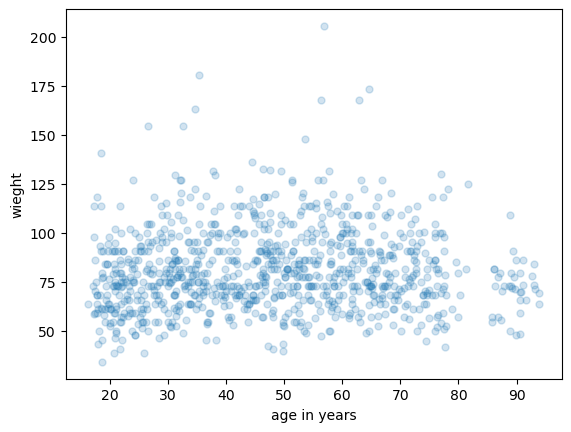

In [84]:
## Jittering

brfss = brfss[:1000]
age = brfss['AGE'] + np.random.normal(0, 2.5, size = len(brfss))
weight = brfss['WTKG3']

plt.plot(age, weight, 'o', markersize = 5, alpha =0.2)
plt.xlabel("age in years")
plt.ylabel('wieght')

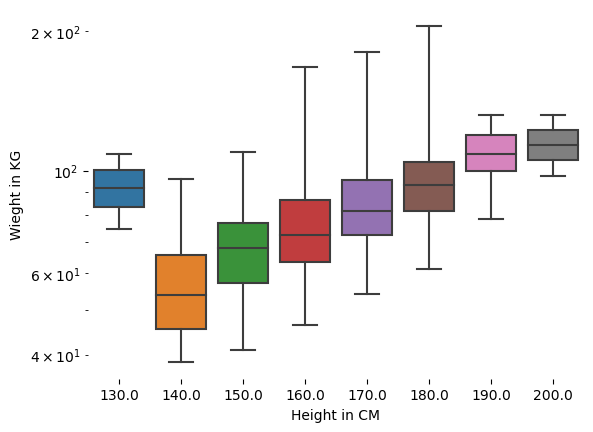

In [85]:
import seaborn as sns

data = brfss.dropna(subset = ['_HTMG10', 'WTKG3'])
sns.boxplot(x= '_HTMG10', y = 'WTKG3', data = data, whis =10)
plt.yscale('log')
sns.despine(left=True, bottom =True)
plt.xlabel('Height in CM')
plt.ylabel('Wieght in KG')
plt.show()

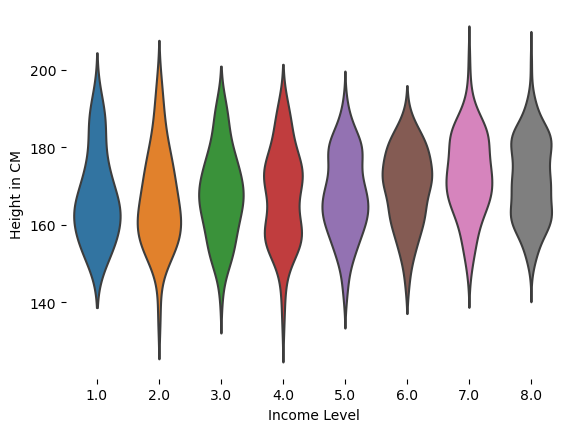

In [87]:
data = brfss.dropna(subset = ['INCOME2', 'HTM4'])
sns.violinplot(x='INCOME2',y='HTM4', inner = None, data=data)
sns.despine(left = True, bottom = True)
plt.xlabel('Income Level')
plt.ylabel('Height in CM')
plt.show()

In [88]:
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]
subset.corr()

,AGE,INCOME2,_VEGESU1
AGE,1.000000,-0.014141,-0.021548
INCOME2,-0.014141,1.000000,0.115264
_VEGESU1,-0.021548,0.115264,1.000000


## Simple Regression

In [89]:
from scipy.stats import linregress
subset = brfss.dropna(subset = ['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']

res = linregress(xs,ys)
res

LinregressResult(slope=0.07000027412424814, intercept=1.5413758521321235, rvalue=0.11526352353306701, pvalue=0.0015115444024927968, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)

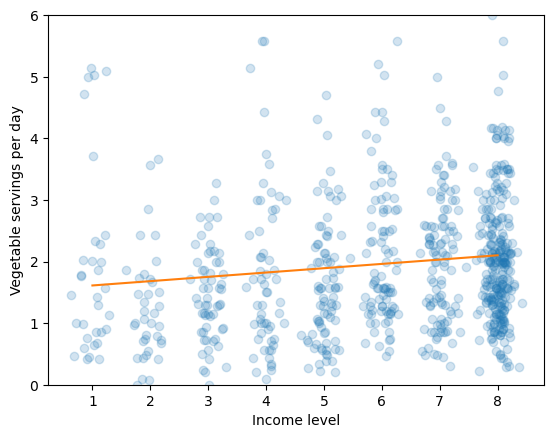

In [93]:
plt.clf()
x_jitter = xs + np.random.normal(0,0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha = 0.2)

## plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.slope * fx + res.intercept
plt.plot(fx, fy, '-', alpha = 1)

plt.xlabel('Income level')
plt.ylabel('Vegetable servings per day')
plt.ylim([0,6])
plt.show()

## Multivariate thinking

In [98]:
from scipy.stats import linregress
import statsmodels.formula.api as smf

subset = brfss.dropna(subset = ['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
res = linregress(xs,ys)
print(res)

results = smf.ols('_VEGESU1 ~ INCOME2', data = brfss).fit()
print(results.params)

LinregressResult(slope=0.07000027412424814, intercept=1.5413758521321235, rvalue=0.11526352353306701, pvalue=0.0015115444024927968, stderr=0.021983967667553426, intercept_stderr=0.1391883671176333)
Intercept    1.541376
INCOME2      0.070000
dtype: float64


In [100]:
## Multiple Regression

results = smf.ols('realinc ~ educ + age', data = gss).fit()
print(results.params)

Intercept   -16117.275684
educ          3655.166921
age             83.731804
dtype: float64


In [101]:
grouped = gss.groupby('age')

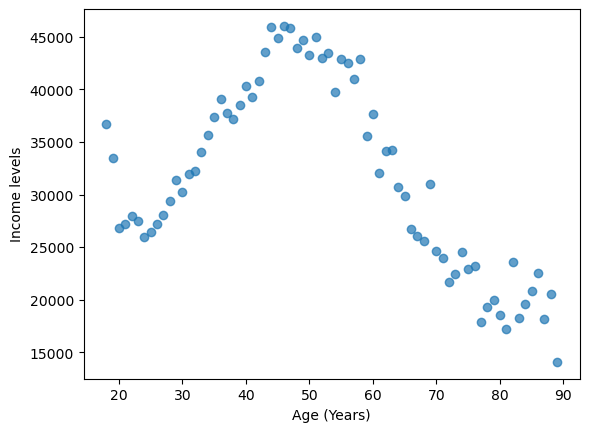

In [104]:
mean_income_byage = grouped['realinc'].mean()
plt.plot(mean_income_byage, 'o', alpha = 0.7)
plt.xlabel('Age (Years)')
plt.ylabel('Income levels')
plt.show()

In [107]:
gss['age2'] = gss['age'] ** 2

model = smf.ols('realinc ~ educ + age + age2', data = gss)
results = model.fit()
print(results.params)


Intercept   -48058.679679
educ          3442.447178
age           1748.232631
age2           -17.437552
dtype: float64


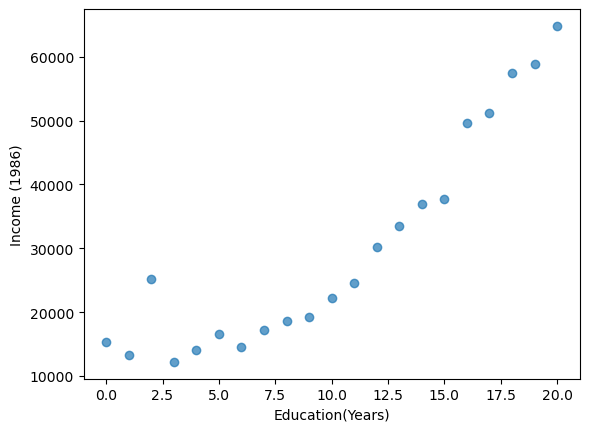

In [110]:
grouped = gss.groupby('educ')

mean_income_by_educ = grouped['realinc'].mean()
plt.plot(mean_income_by_educ, 'o', alpha = 0.7)
plt.xlabel('Education(Years)')
plt.ylabel('Income (1986)')
plt.show()

In [111]:
gss['educ2'] = gss['educ'] ** 2
model = smf.ols('realinc~educ+educ2+age+age2', data = gss)
results = model.fit()
results.params

Intercept   -23241.884034
educ          -528.309369
educ2          159.966740
age           1696.717149
age2           -17.196984
dtype: float64

In [113]:
results = smf.ols('realinc ~ educ+educ2+age+age2', data = gss).fit()

### Create a dataframe
df = pd.DataFrame()
df['educ'] = np.linspace(0,20)
df['age'] = 30
df['educ2'] = df['educ'] ** 2
df['age2'] = df['age'] ** 2

pred = results.predict(df)
print(pred)

0     12182.344976
1     11993.358518
2     11857.672098
3     11775.285717
4     11746.199374
5     11770.413069
6     11847.926802
7     11978.740574
8     12162.854384
9     12400.268232
10    12690.982118
11    13034.996043
12    13432.310006
13    13882.924007
14    14386.838046
15    14944.052124
16    15554.566240
17    16218.380394
18    16935.494586
19    17705.908817
20    18529.623086
21    19406.637393
22    20336.951738
23    21320.566122
24    22357.480544
25    23447.695004
26    24591.209502
27    25788.024039
28    27038.138614
29    28341.553227
30    29698.267878
31    31108.282568
32    32571.597295
33    34088.212062
34    35658.126866
35    37281.341709
36    38957.856589
37    40687.671509
38    42470.786466
39    44307.201462
40    46196.916495
41    48139.931567
42    50136.246678
43    52185.861826
44    54288.777013
45    56444.992238
46    58654.507502
47    60917.322803
48    63233.438143
49    65602.853521
dtype: float64


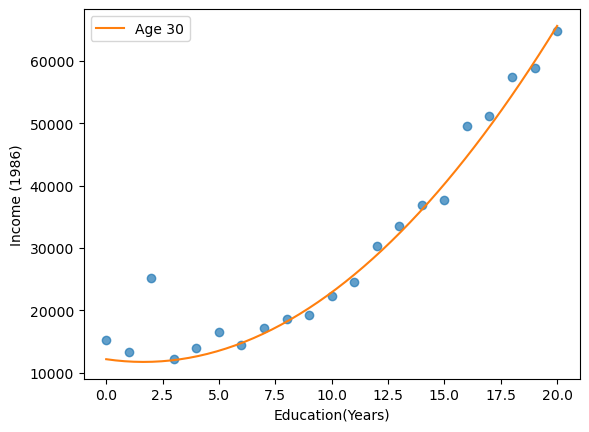

In [116]:
plt.clf()
grouped = gss.groupby('educ')
mean_income_byeduc = grouped['realinc'].mean()
plt.plot(mean_income_byeduc, 'o', alpha = 0.7)

pred = results.predict(df)
plt.plot(df['educ'], pred, label = 'Age 30')

plt.xlabel('Education(Years)')
plt.ylabel('Income (1986)')
plt.legend()
plt.show()

## Logistic Regression

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6
Intercept     -1.685223
C(sex)[T.2]   -0.384611
age           -0.034756
age2           0.000192
educ           0.221860
educ2         -0.004163
dtype: float64


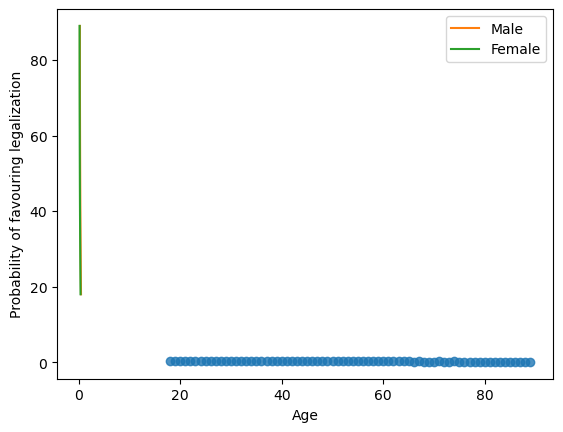

In [126]:
gss['grass'].replace(2, 0, inplace = True)

results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data= gss).fit()
print(results.params)

## Make a Dataframe
df = pd.DataFrame()

df['age'] = np.linspace(18, 89)
df['age2'] = df['age'] ** 2

df['educ'] = 12
df['educ2'] = df['educ'] ** 2

df['sex'] = 1
pred1 = results.predict(df)

df['sex'] = 2
pred2 = results.predict(df)

plt.clf()
grouped = gss.groupby('age')
mean_favour_by_age = grouped['grass'].mean()
plt.plot(mean_favour_by_age, 'o', alpha =0.8)

plt.plot(pred1,df['age'],label = 'Male')
plt.plot(pred2,df['age'],label = 'Female')

plt.xlabel('Age')
plt.ylabel('Probability of favouring legalization')

plt.legend()
plt.show()

Optimization terminated successfully.
         Current function value: 0.588510
         Iterations 6


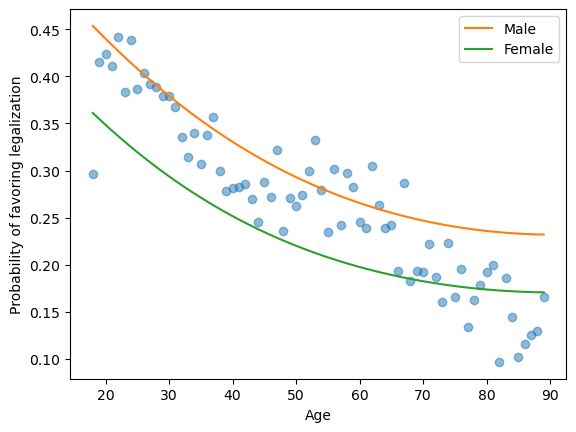

In [122]:
# Recode grass
gss['grass'].replace(2, 0, inplace=True)
 
# Run logistic regression
results = smf.logit('grass ~ age + age2 + educ + educ2 + C(sex)', data=gss).fit()
results.params

# Make a DataFrame with a range of ages
df = pd.DataFrame()
df['age'] = np.linspace(18, 89)
df['age2'] = df['age']**2
 
# Set the education level to 12
df['educ'] = 12
df['educ2'] = df['educ']**2
 
# Generate predictions for men and women
df['sex'] = 1
pred1 = results.predict(df)
 
df['sex'] = 2
pred2 = results.predict(df)
 
grouped = gss.groupby('age')
favor_by_age = grouped['grass'].mean()
plt.clf()
plt.plot(favor_by_age, 'o', alpha=0.5)
 
plt.plot(df['age'], pred1, label='Male')
plt.plot(df['age'], pred2, label='Female')
 
plt.xlabel('Age')
plt.ylabel('Probability of favoring legalization')
plt.legend()
plt.show()